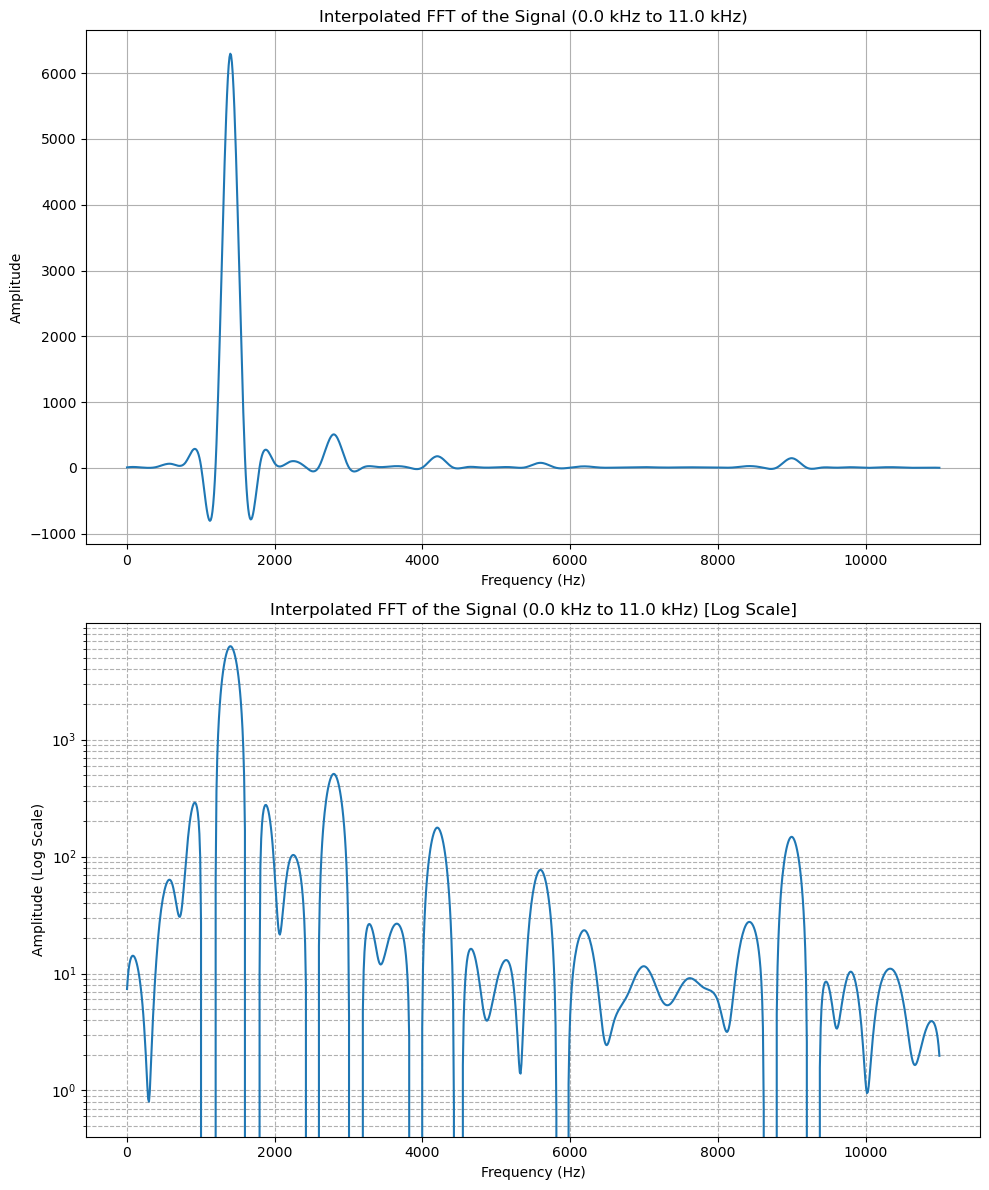

In [9]:
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 주파수 범위 설정 (단위: Hz)
min_freq = 0  # 최소 주파수 (9 kHz)
max_freq = 11000  # 최대 주파수 (11 kHz)

# CSV 파일 로드
file_path = 'C1Trace00000.csv'  # 파일 경로를 입력하세요
data = pd.read_csv(file_path, skiprows=6)

# 열 이름 재설정
data.columns = ['Time', 'Voltage']

# NaN 값 제거
data = data.dropna()

# 시간 및 전압 데이터 추출
time = data['Time'].values
voltage = data['Voltage'].values

# FFT 수행
n = len(time)
dt = time[1] - time[0]  # 균일한 샘플링 가정
frequencies = fftfreq(n, d=dt)
fft_values = fft(voltage)

# 양수 주파수만 선택
positive_frequencies = frequencies[:n//2]
positive_fft_values = np.abs(fft_values[:n//2])

# 설정된 주파수 범위를 필터링
filtered_indices = (positive_frequencies >= min_freq) & (positive_frequencies <= max_freq)
filtered_frequencies = positive_frequencies[filtered_indices]
filtered_fft_values = positive_fft_values[filtered_indices]

# 데이터 포인트를 1000개로 인터폴레이션
new_frequency_points = np.linspace(filtered_frequencies.min(), filtered_frequencies.max(), 1000)
interpolator = interp1d(filtered_frequencies, filtered_fft_values, kind='cubic')
new_fft_values = interpolator(new_frequency_points)

# 서브플롯 생성
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 선형 스케일 플롯
axs[0].plot(new_frequency_points, new_fft_values)
axs[0].set_title(f'Interpolated FFT of the Signal ({min_freq/1000} kHz to {max_freq/1000} kHz)')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)

# 로그 스케일 플롯
axs[1].plot(new_frequency_points, new_fft_values)
axs[1].set_yscale('log')
axs[1].set_title(f'Interpolated FFT of the Signal ({min_freq/1000} kHz to {max_freq/1000} kHz) [Log Scale]')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude (Log Scale)')
axs[1].grid(True, which="both", ls="--")

# 플롯 간격 조정
plt.tight_layout()
plt.show()


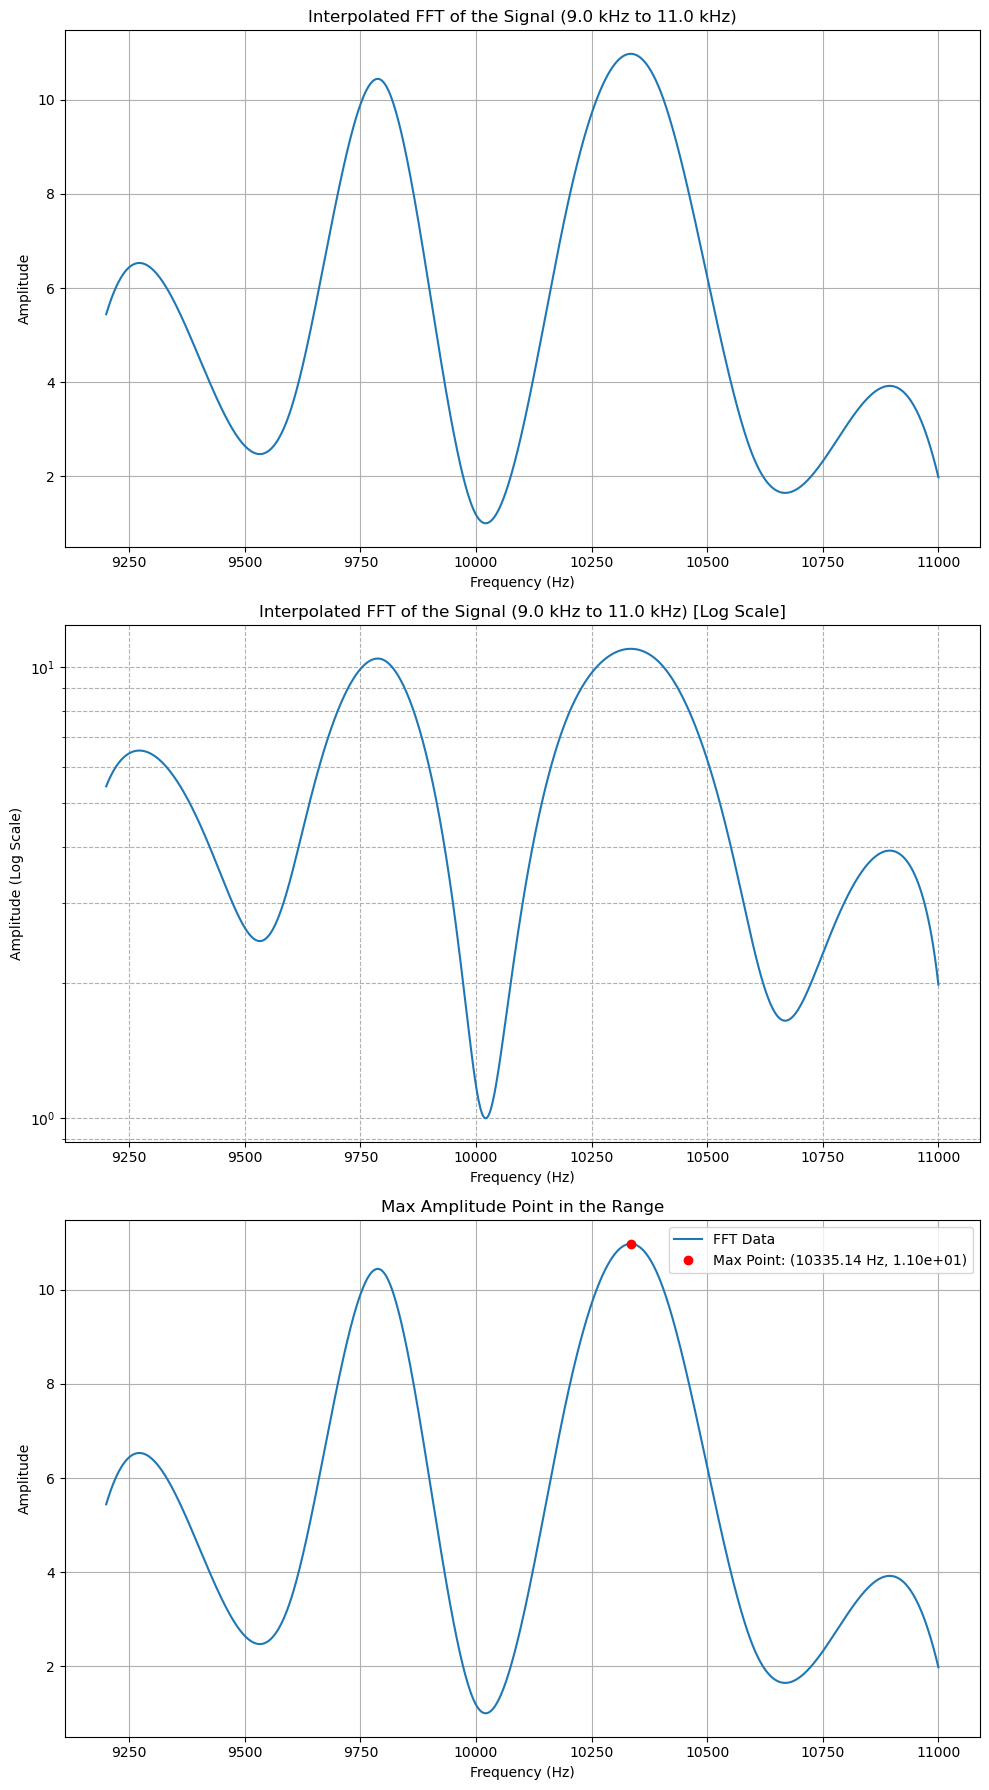

In [12]:
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 주파수 범위 설정 (단위: Hz)
min_freq = 9000  # 최소 주파수 (9 kHz)
max_freq = 11000  # 최대 주파수 (11 kHz)

# CSV 파일 로드
file_path = 'C1Trace00000.csv'  # 파일 경로를 입력하세요
data = pd.read_csv(file_path, skiprows=6)

# 열 이름 재설정
data.columns = ['Time', 'Voltage']

# NaN 값 제거
data = data.dropna()

# 시간 및 전압 데이터 추출
time = data['Time'].values
voltage = data['Voltage'].values

# FFT 수행
n = len(time)
dt = time[1] - time[0]  # 균일한 샘플링 가정
frequencies = fftfreq(n, d=dt)
fft_values = fft(voltage)

# 양수 주파수만 선택
positive_frequencies = frequencies[:n//2]
positive_fft_values = np.abs(fft_values[:n//2])

# 설정된 주파수 범위를 필터링
filtered_indices = (positive_frequencies >= min_freq) & (positive_frequencies <= max_freq)
filtered_frequencies = positive_frequencies[filtered_indices]
filtered_fft_values = positive_fft_values[filtered_indices]

# 데이터 포인트를 1000개로 인터폴레이션
new_frequency_points = np.linspace(filtered_frequencies.min(), filtered_frequencies.max(), 1000)
interpolator = interp1d(filtered_frequencies, filtered_fft_values, kind='cubic')
new_fft_values = interpolator(new_frequency_points)

# 최대 진폭 값을 가지는 데이터 포인트 찾기
max_amplitude_index = np.argmax(new_fft_values)
max_frequency = new_frequency_points[max_amplitude_index]
max_amplitude = new_fft_values[max_amplitude_index]

# 서브플롯 생성
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# 선형 스케일 플롯
axs[0].plot(new_frequency_points, new_fft_values)
axs[0].set_title(f'Interpolated FFT of the Signal ({min_freq/1000} kHz to {max_freq/1000} kHz)')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)

# 로그 스케일 플롯
axs[1].plot(new_frequency_points, new_fft_values)
axs[1].set_yscale('log')
axs[1].set_title(f'Interpolated FFT of the Signal ({min_freq/1000} kHz to {max_freq/1000} kHz) [Log Scale]')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude (Log Scale)')
axs[1].grid(True, which="both", ls="--")

# 최대 진폭 데이터 포인트 플롯
axs[2].plot(new_frequency_points, new_fft_values, label='FFT Data')
axs[2].plot(max_frequency, max_amplitude, 'ro', label=f'Max Point: ({max_frequency:.2f} Hz, {max_amplitude:.2e})')
axs[2].set_title('Max Amplitude Point in the Range')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Amplitude')
axs[2].grid(True)
axs[2].legend()

# 플롯 간격 조정
plt.tight_layout()
plt.show()


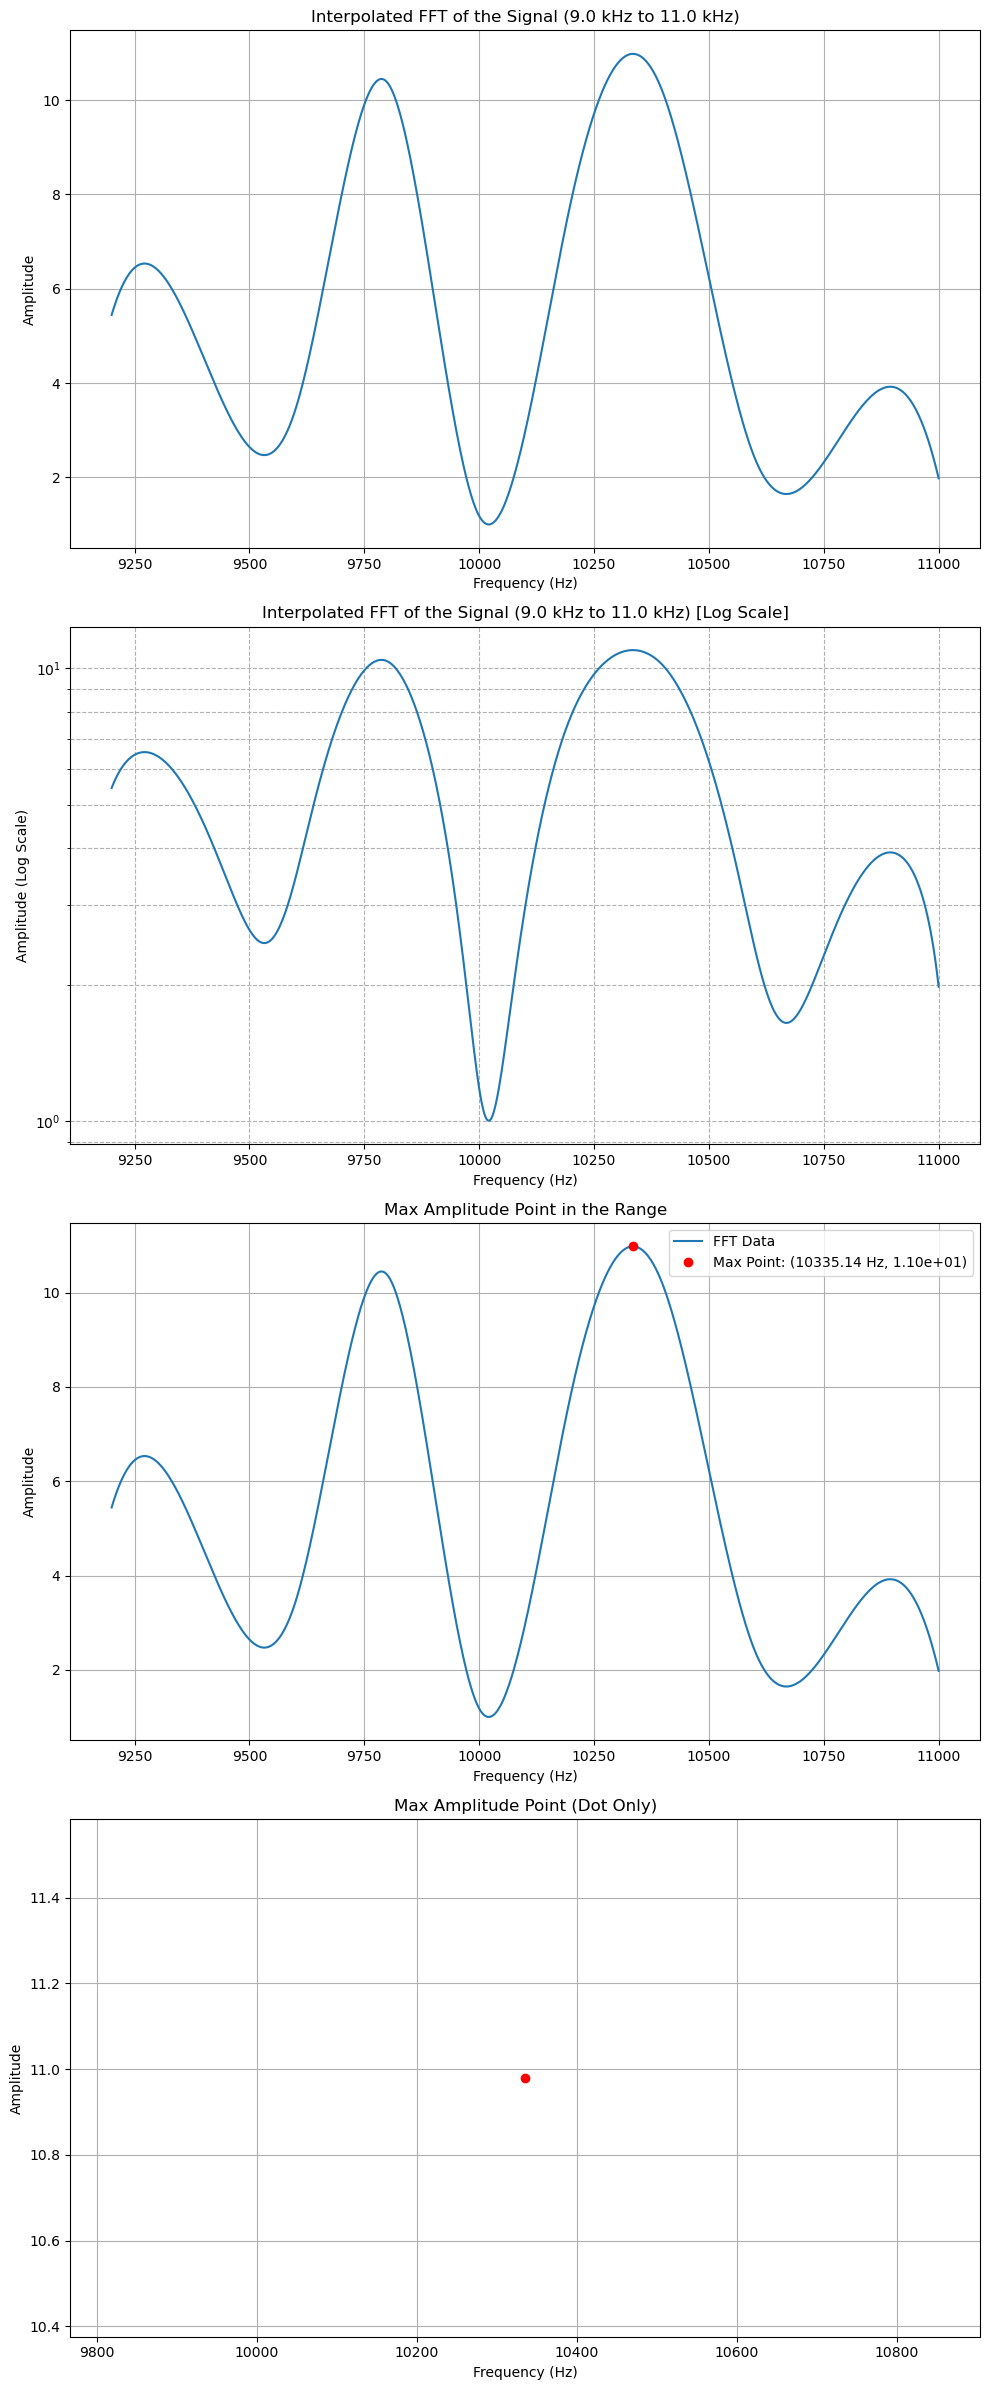

In [13]:
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 주파수 범위 설정 (단위: Hz)
min_freq = 9000  # 최소 주파수 (9 kHz)
max_freq = 11000  # 최대 주파수 (11 kHz)

# CSV 파일 로드
file_path = 'C1Trace00000.csv'  # 파일 경로를 입력하세요
data = pd.read_csv(file_path, skiprows=6)

# 열 이름 재설정
data.columns = ['Time', 'Voltage']

# NaN 값 제거
data = data.dropna()

# 시간 및 전압 데이터 추출
time = data['Time'].values
voltage = data['Voltage'].values

# FFT 수행
n = len(time)
dt = time[1] - time[0]  # 균일한 샘플링 가정
frequencies = fftfreq(n, d=dt)
fft_values = fft(voltage)

# 양수 주파수만 선택
positive_frequencies = frequencies[:n//2]
positive_fft_values = np.abs(fft_values[:n//2])

# 설정된 주파수 범위를 필터링
filtered_indices = (positive_frequencies >= min_freq) & (positive_frequencies <= max_freq)
filtered_frequencies = positive_frequencies[filtered_indices]
filtered_fft_values = positive_fft_values[filtered_indices]

# 데이터 포인트를 1000개로 인터폴레이션
new_frequency_points = np.linspace(filtered_frequencies.min(), filtered_frequencies.max(), 1000)
interpolator = interp1d(filtered_frequencies, filtered_fft_values, kind='cubic')
new_fft_values = interpolator(new_frequency_points)

# 최대 진폭 값을 가지는 데이터 포인트 찾기
max_amplitude_index = np.argmax(new_fft_values)
max_frequency = new_frequency_points[max_amplitude_index]
max_amplitude = new_fft_values[max_amplitude_index]

# 서브플롯 생성
fig, axs = plt.subplots(4, 1, figsize=(10, 24))

# 선형 스케일 플롯
axs[0].plot(new_frequency_points, new_fft_values)
axs[0].set_title(f'Interpolated FFT of the Signal ({min_freq/1000} kHz to {max_freq/1000} kHz)')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)

# 로그 스케일 플롯
axs[1].plot(new_frequency_points, new_fft_values)
axs[1].set_yscale('log')
axs[1].set_title(f'Interpolated FFT of the Signal ({min_freq/1000} kHz to {max_freq/1000} kHz) [Log Scale]')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude (Log Scale)')
axs[1].grid(True, which="both", ls="--")

# 최대 진폭 데이터 포인트 플롯
axs[2].plot(new_frequency_points, new_fft_values, label='FFT Data')
axs[2].plot(max_frequency, max_amplitude, 'ro', label=f'Max Point: ({max_frequency:.2f} Hz, {max_amplitude:.2e})')
axs[2].set_title('Max Amplitude Point in the Range')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Amplitude')
axs[2].grid(True)
axs[2].legend()

# 최대 진폭 데이터 점만 표시하는 플롯
axs[3].plot(max_frequency, max_amplitude, 'ro')
axs[3].set_title('Max Amplitude Point (Dot Only)')
axs[3].set_xlabel('Frequency (Hz)')
axs[3].set_ylabel('Amplitude')
axs[3].grid(True)

# 플롯 간격 조정
plt.tight_layout()
plt.show()


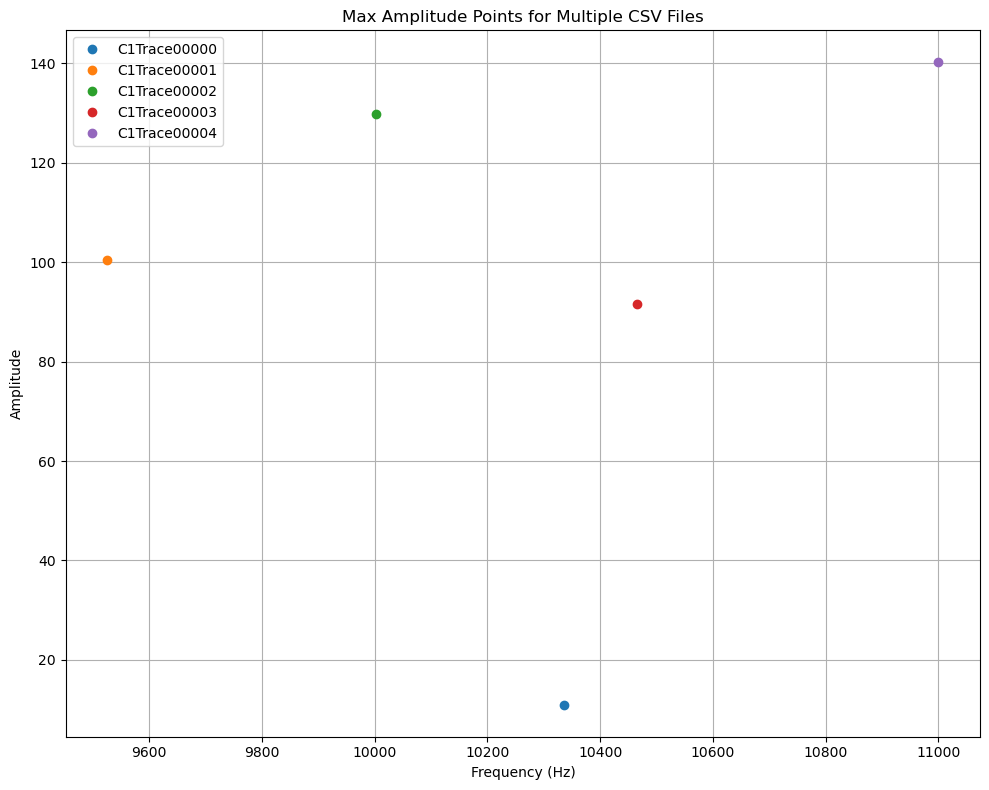

In [14]:
import glob
import os

# 주파수 범위 설정 (단위: Hz)
min_freq = 9000  # 최소 주파수 (9 kHz)
max_freq = 11000  # 최대 주파수 (11 kHz)

# CSV 파일 목록 가져오기
csv_files = glob.glob("*.csv")

# 플롯 초기 설정
plt.figure(figsize=(10, 8))

# 서로 다른 색상 및 범례로 최대값을 플로팅
for file in csv_files:
    # CSV 파일 로드
    data = pd.read_csv(file, skiprows=6)

    # 열 이름 재설정
    data.columns = ['Time', 'Voltage']

    # NaN 값 제거
    data = data.dropna()

    # 시간 및 전압 데이터 추출
    time = data['Time'].values
    voltage = data['Voltage'].values

    # FFT 수행
    n = len(time)
    dt = time[1] - time[0]  # 균일한 샘플링 가정
    frequencies = fftfreq(n, d=dt)
    fft_values = fft(voltage)

    # 양수 주파수만 선택
    positive_frequencies = frequencies[:n//2]
    positive_fft_values = np.abs(fft_values[:n//2])

    # 설정된 주파수 범위를 필터링
    filtered_indices = (positive_frequencies >= min_freq) & (positive_frequencies <= max_freq)
    filtered_frequencies = positive_frequencies[filtered_indices]
    filtered_fft_values = positive_fft_values[filtered_indices]

    # 데이터 포인트를 1000개로 인터폴레이션
    new_frequency_points = np.linspace(filtered_frequencies.min(), filtered_frequencies.max(), 1000)
    interpolator = interp1d(filtered_frequencies, filtered_fft_values, kind='cubic')
    new_fft_values = interpolator(new_frequency_points)

    # 최대 진폭 값을 가지는 데이터 포인트 찾기
    max_amplitude_index = np.argmax(new_fft_values)
    max_frequency = new_frequency_points[max_amplitude_index]
    max_amplitude = new_fft_values[max_amplitude_index]

    # 파일명에서 확장자 제거하여 범례로 사용
    label = os.path.splitext(os.path.basename(file))[0]

    # 최대 진폭 데이터 점만 표시
    plt.plot(max_frequency, max_amplitude, 'o', label=label)

# 플롯 설정
plt.title('Max Amplitude Points for Multiple CSV Files')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



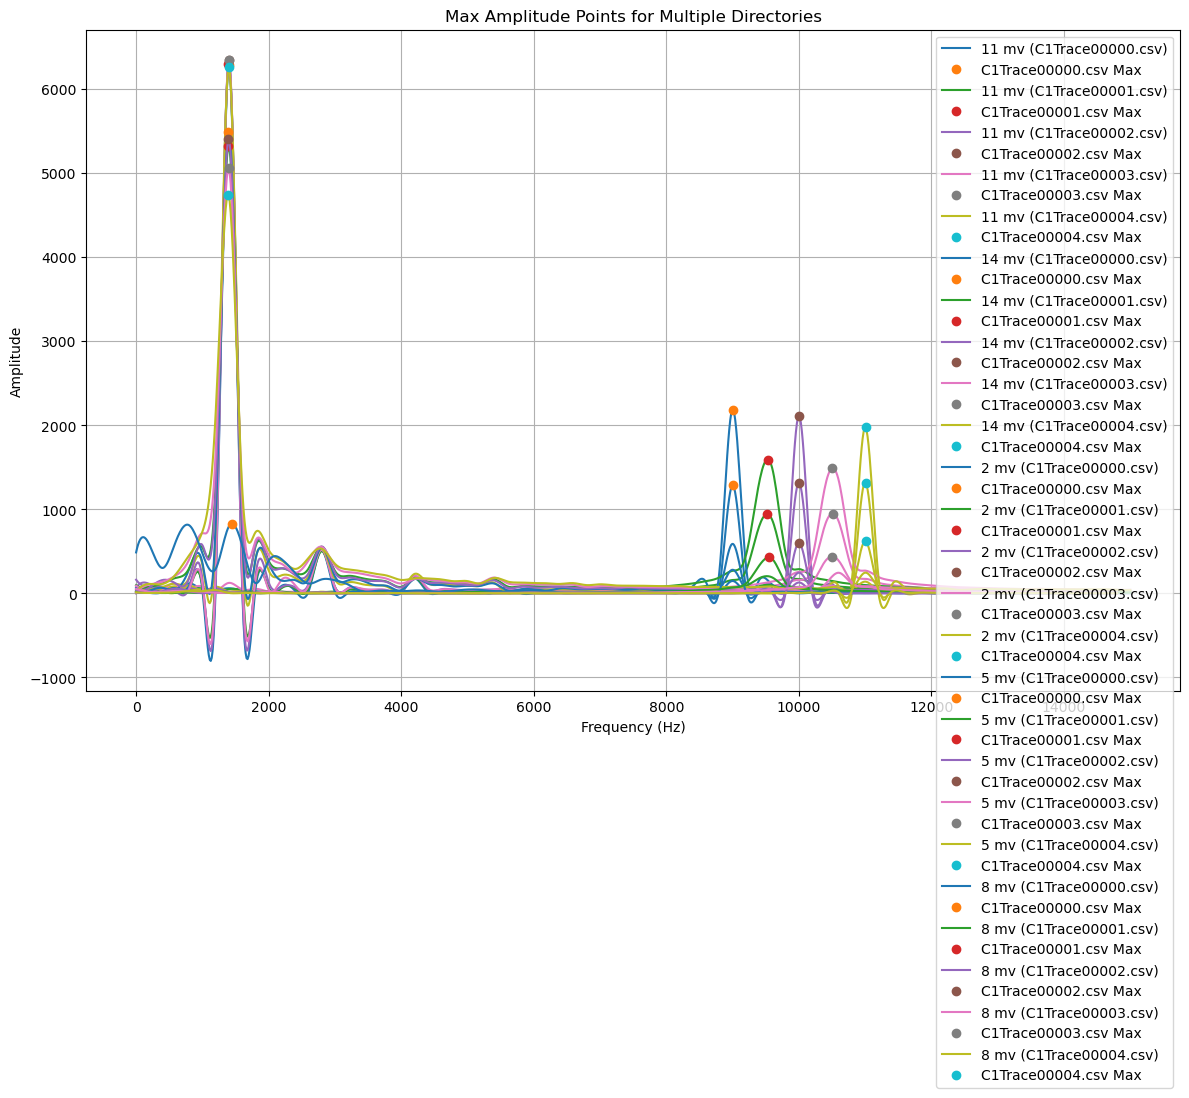

In [17]:
import glob
import os
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 주파수 범위 설정 (단위: Hz)
min_freq = 0  # 최소 주파수 (9 kHz)
max_freq = 15000  # 최대 주파수 (11 kHz)

# 상위 디렉토리로 이동
parent_dir = os.path.dirname(os.getcwd())
subdirs = [d for d in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, d))]

# 플롯 설정
plt.figure(figsize=(12, 10))

# 상위 디렉토리 내의 각 서브 디렉토리에 대해 플롯 생성
for subdir in subdirs:
    subdir_path = os.path.join(parent_dir, subdir)
    csv_files = glob.glob(os.path.join(subdir_path, "*.csv"))
    
    # 디렉토리에서 하나의 플롯에 대한 데이터 수집
    for file in csv_files:
        data = pd.read_csv(file, skiprows=6)
        data.columns = ['Time', 'Voltage']
        data = data.dropna()

        time = data['Time'].values
        voltage = data['Voltage'].values

        n = len(time)
        dt = time[1] - time[0]
        frequencies = fftfreq(n, d=dt)
        fft_values = fft(voltage)

        positive_frequencies = frequencies[:n//2]
        positive_fft_values = np.abs(fft_values[:n//2])

        filtered_indices = (positive_frequencies >= min_freq) & (positive_frequencies <= max_freq)
        filtered_frequencies = positive_frequencies[filtered_indices]
        filtered_fft_values = positive_fft_values[filtered_indices]

        new_frequency_points = np.linspace(filtered_frequencies.min(), filtered_frequencies.max(), 1000)
        interpolator = interp1d(filtered_frequencies, filtered_fft_values, kind='cubic')
        new_fft_values = interpolator(new_frequency_points)

        max_amplitude_index = np.argmax(new_fft_values)
        max_frequency = new_frequency_points[max_amplitude_index]
        max_amplitude = new_fft_values[max_amplitude_index]

        # 실선과 점으로 표현, 디렉토리 이름을 범례로 사용
        plt.plot(new_frequency_points, new_fft_values, label=f'{subdir} ({os.path.basename(file)})')
        plt.plot(max_frequency, max_amplitude, 'o', label=f'{os.path.basename(file)} Max')

# 플롯 설정
plt.title('Max Amplitude Points for Multiple Directories')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


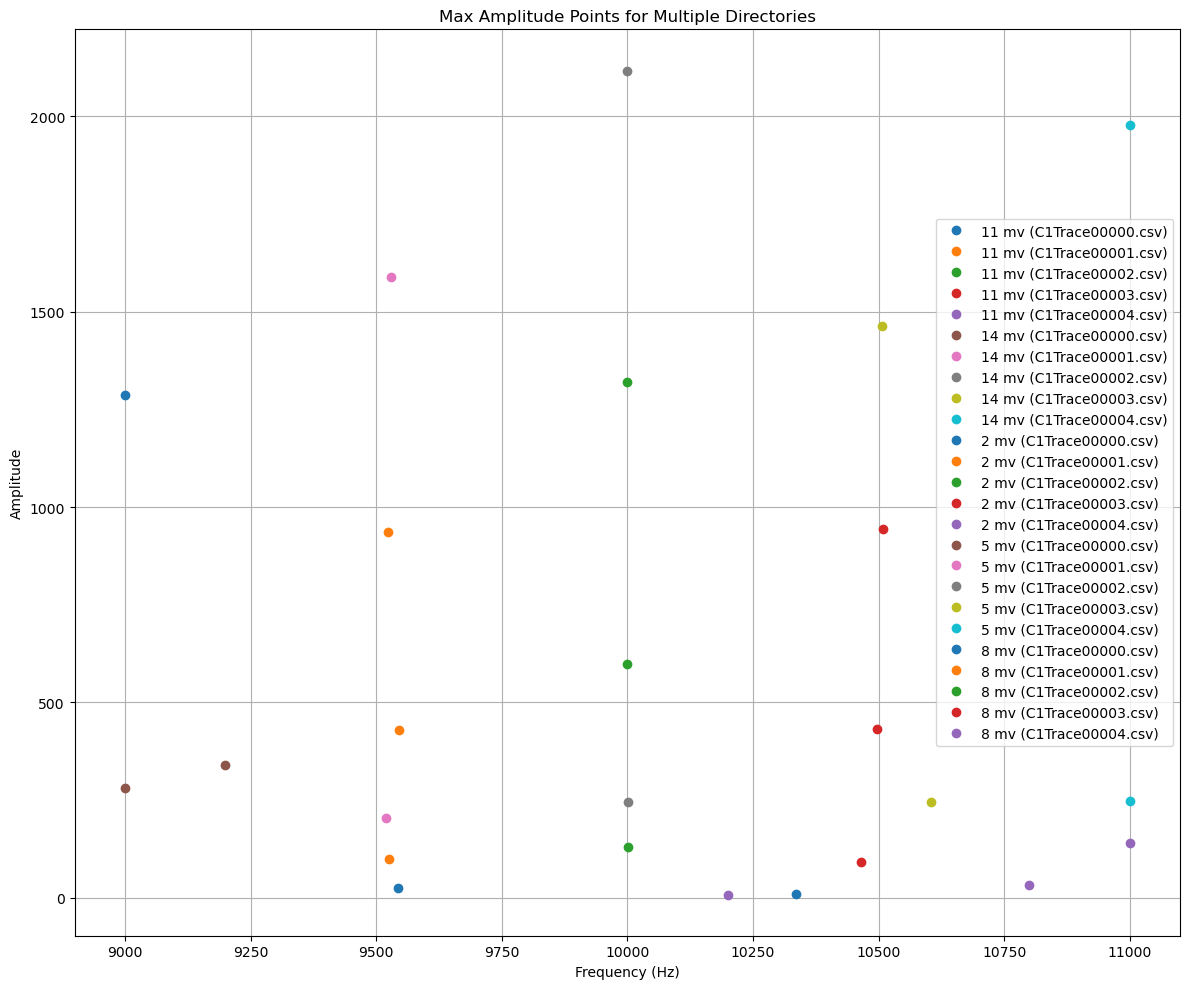

In [16]:
import glob
import os
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 주파수 범위 설정 (단위: Hz)
min_freq = 9000  # 최소 주파수 (9 kHz)
max_freq = 11000  # 최대 주파수 (11 kHz)

# 상위 디렉토리로 이동
parent_dir = os.path.dirname(os.getcwd())
subdirs = [d for d in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, d))]

# 플롯 설정
plt.figure(figsize=(12, 10))

# 상위 디렉토리 내의 각 서브 디렉토리에 대해 플롯 생성
for subdir in subdirs:
    subdir_path = os.path.join(parent_dir, subdir)
    csv_files = glob.glob(os.path.join(subdir_path, "*.csv"))
    
    # 디렉토리에서 하나의 플롯에 대한 데이터 수집
    for file in csv_files:
        data = pd.read_csv(file, skiprows=6)
        data.columns = ['Time', 'Voltage']
        data = data.dropna()

        time = data['Time'].values
        voltage = data['Voltage'].values

        n = len(time)
        dt = time[1] - time[0]
        frequencies = fftfreq(n, d=dt)
        fft_values = fft(voltage)

        positive_frequencies = frequencies[:n//2]
        positive_fft_values = np.abs(fft_values[:n//2])

        filtered_indices = (positive_frequencies >= min_freq) & (positive_frequencies <= max_freq)
        filtered_frequencies = positive_frequencies[filtered_indices]
        filtered_fft_values = positive_fft_values[filtered_indices]

        new_frequency_points = np.linspace(filtered_frequencies.min(), filtered_frequencies.max(), 1000)
        interpolator = interp1d(filtered_frequencies, filtered_fft_values, kind='cubic')
        new_fft_values = interpolator(new_frequency_points)

        max_amplitude_index = np.argmax(new_fft_values)
        max_frequency = new_frequency_points[max_amplitude_index]
        max_amplitude = new_fft_values[max_amplitude_index]

        # 점만 표시, 디렉토리 이름을 범례로 사용
        plt.plot(max_frequency, max_amplitude, 'o', label=f'{subdir} ({os.path.basename(file)})')

# 플롯 설정
plt.title('Max Amplitude Points for Multiple Directories')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


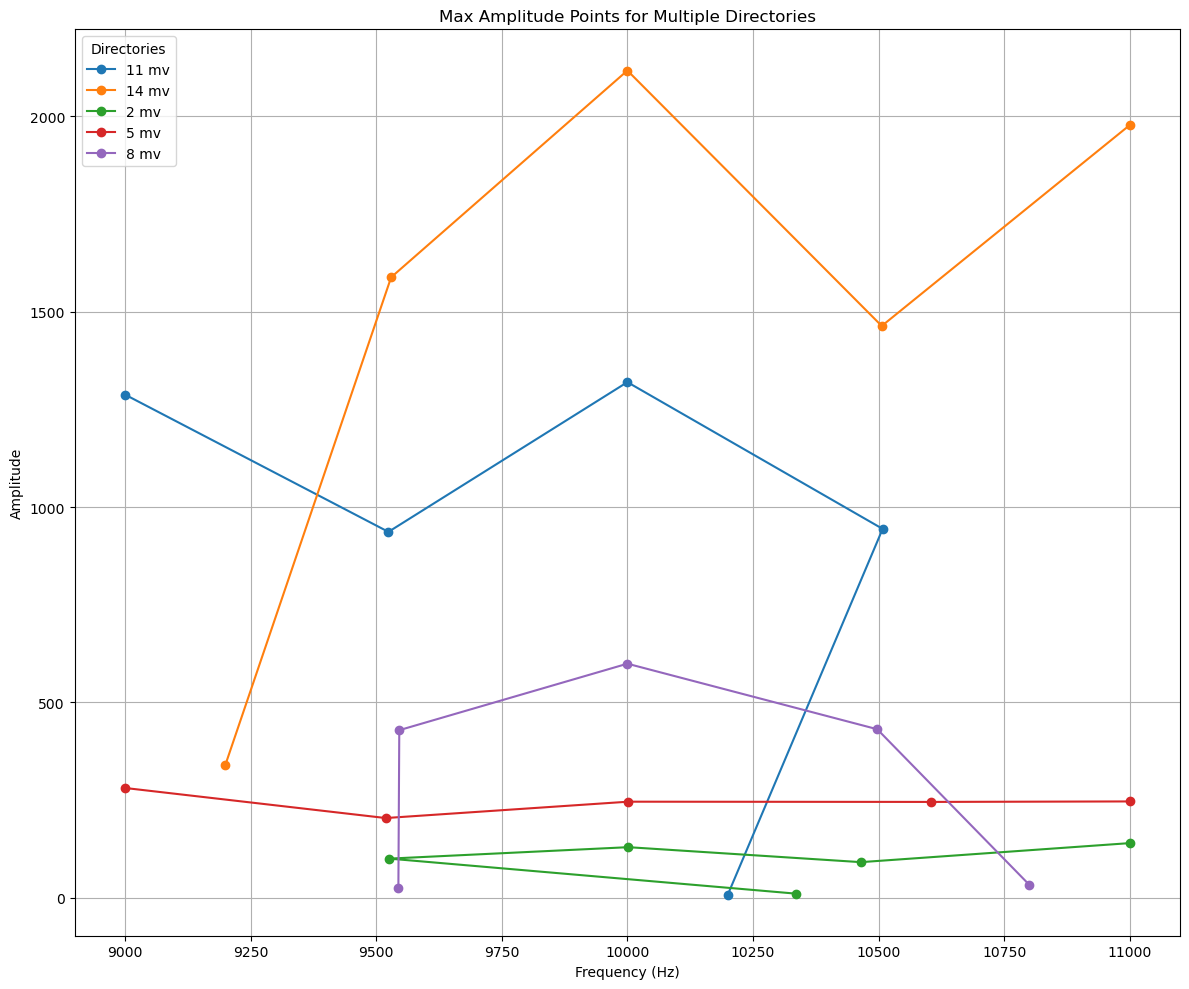

In [18]:
import glob
import os
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 주파수 범위 설정 (단위: Hz)
min_freq = 9000  # 최소 주파수 (9 kHz)
max_freq = 11000  # 최대 주파수 (11 kHz)

# 상위 디렉토리로 이동
parent_dir = os.path.dirname(os.getcwd())
subdirs = [d for d in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, d))]

# 플롯 설정
plt.figure(figsize=(12, 10))

# 상위 디렉토리 내의 각 서브 디렉토리에 대해 플롯 생성
for subdir in subdirs:
    subdir_path = os.path.join(parent_dir, subdir)
    csv_files = glob.glob(os.path.join(subdir_path, "*.csv"))
    
    # 디렉토리에서 하나의 플롯에 대한 데이터 수집
    max_frequencies = []
    max_amplitudes = []
    
    for file in csv_files:
        data = pd.read_csv(file, skiprows=6)
        data.columns = ['Time', 'Voltage']
        data = data.dropna()

        time = data['Time'].values
        voltage = data['Voltage'].values

        n = len(time)
        dt = time[1] - time[0]
        frequencies = fftfreq(n, d=dt)
        fft_values = fft(voltage)

        positive_frequencies = frequencies[:n//2]
        positive_fft_values = np.abs(fft_values[:n//2])

        filtered_indices = (positive_frequencies >= min_freq) & (positive_frequencies <= max_freq)
        filtered_frequencies = positive_frequencies[filtered_indices]
        filtered_fft_values = positive_fft_values[filtered_indices]

        new_frequency_points = np.linspace(filtered_frequencies.min(), filtered_frequencies.max(), 1000)
        interpolator = interp1d(filtered_frequencies, filtered_fft_values, kind='cubic')
        new_fft_values = interpolator(new_frequency_points)

        max_amplitude_index = np.argmax(new_fft_values)
        max_frequency = new_frequency_points[max_amplitude_index]
        max_amplitude = new_fft_values[max_amplitude_index]

        # 최대 진폭 데이터를 리스트에 저장
        max_frequencies.append(max_frequency)
        max_amplitudes.append(max_amplitude)
    
    # 저장된 데이터로 플롯, 점과 점을 실선으로 연결
    plt.plot(max_frequencies, max_amplitudes, '-o', label=subdir)

# 플롯 설정
plt.title('Max Amplitude Points for Multiple Directories')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(title='Directories')
plt.tight_layout()
plt.show()


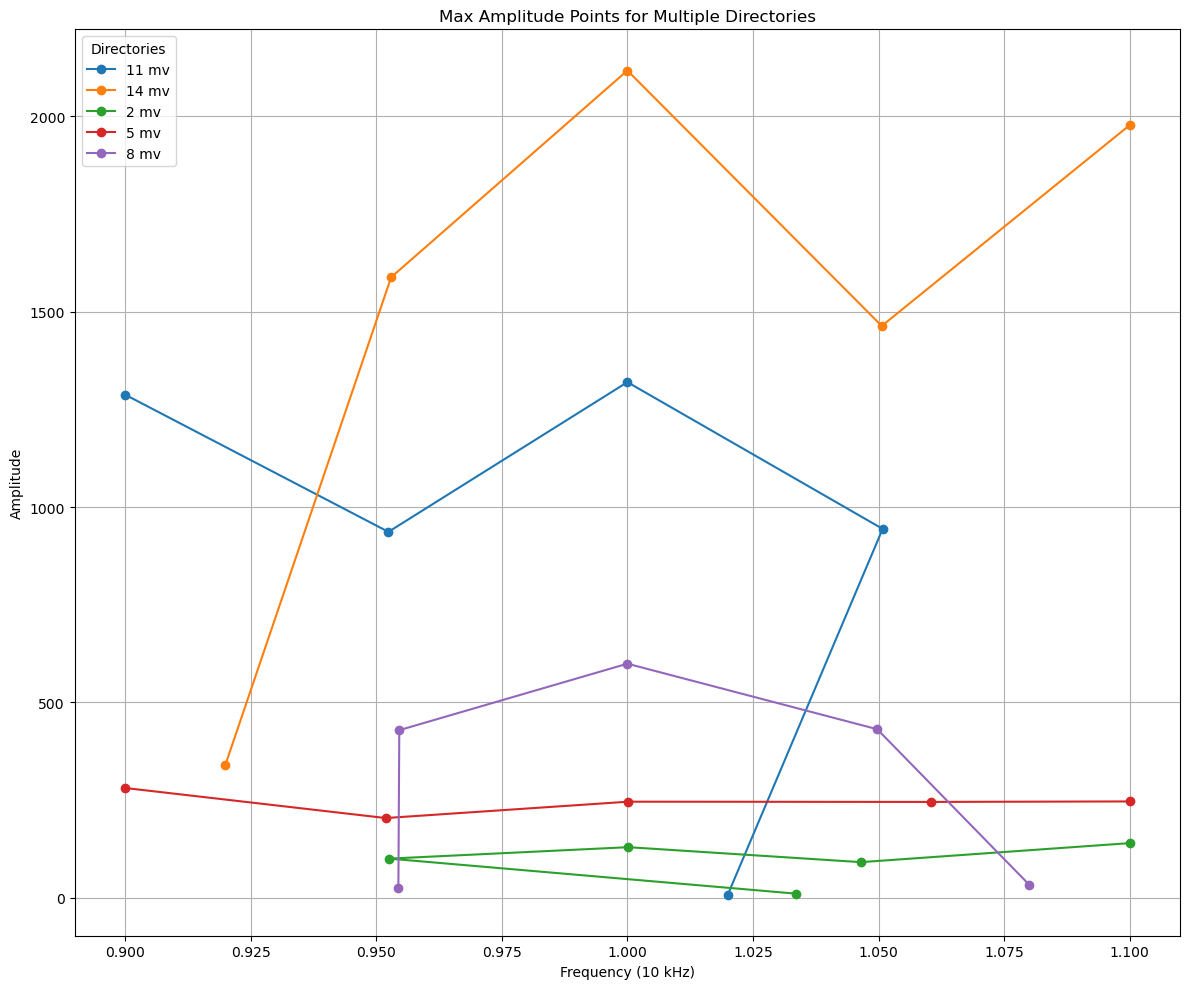

In [19]:
import glob
import os
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 주파수 범위 설정 (단위: Hz)
min_freq = 9000  # 최소 주파수 (9 kHz)
max_freq = 11000  # 최대 주파수 (11 kHz)

# 상위 디렉토리로 이동
parent_dir = os.path.dirname(os.getcwd())
subdirs = [d for d in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, d))]

# 플롯 설정
plt.figure(figsize=(12, 10))

# 상위 디렉토리 내의 각 서브 디렉토리에 대해 플롯 생성
for subdir in subdirs:
    subdir_path = os.path.join(parent_dir, subdir)
    csv_files = glob.glob(os.path.join(subdir_path, "*.csv"))
    
    # 디렉토리에서 하나의 플롯에 대한 데이터 수집
    max_frequencies = []
    max_amplitudes = []
    
    for file in csv_files:
        data = pd.read_csv(file, skiprows=6)
        data.columns = ['Time', 'Voltage']
        data = data.dropna()

        time = data['Time'].values
        voltage = data['Voltage'].values

        n = len(time)
        dt = time[1] - time[0]
        frequencies = fftfreq(n, d=dt)
        fft_values = fft(voltage)

        positive_frequencies = frequencies[:n//2]
        positive_fft_values = np.abs(fft_values[:n//2])

        filtered_indices = (positive_frequencies >= min_freq) & (positive_frequencies <= max_freq)
        filtered_frequencies = positive_frequencies[filtered_indices]
        filtered_fft_values = positive_fft_values[filtered_indices]

        new_frequency_points = np.linspace(filtered_frequencies.min(), filtered_frequencies.max(), 1000)
        interpolator = interp1d(filtered_frequencies, filtered_fft_values, kind='cubic')
        new_fft_values = interpolator(new_frequency_points)

        max_amplitude_index = np.argmax(new_fft_values)
        max_frequency = new_frequency_points[max_amplitude_index] / 10000  # 주파수를 10 kHz 단위로 변환
        max_amplitude = new_fft_values[max_amplitude_index]

        # 최대 진폭 데이터를 리스트에 저장
        max_frequencies.append(max_frequency)
        max_amplitudes.append(max_amplitude)
    
    # 저장된 데이터로 플롯, 점과 점을 실선으로 연결
    plt.plot(max_frequencies, max_amplitudes, '-o', label=subdir)

# 플롯 설정
plt.title('Max Amplitude Points for Multiple Directories')
plt.xlabel('Frequency (10 kHz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(title='Directories')
plt.tight_layout()
plt.show()


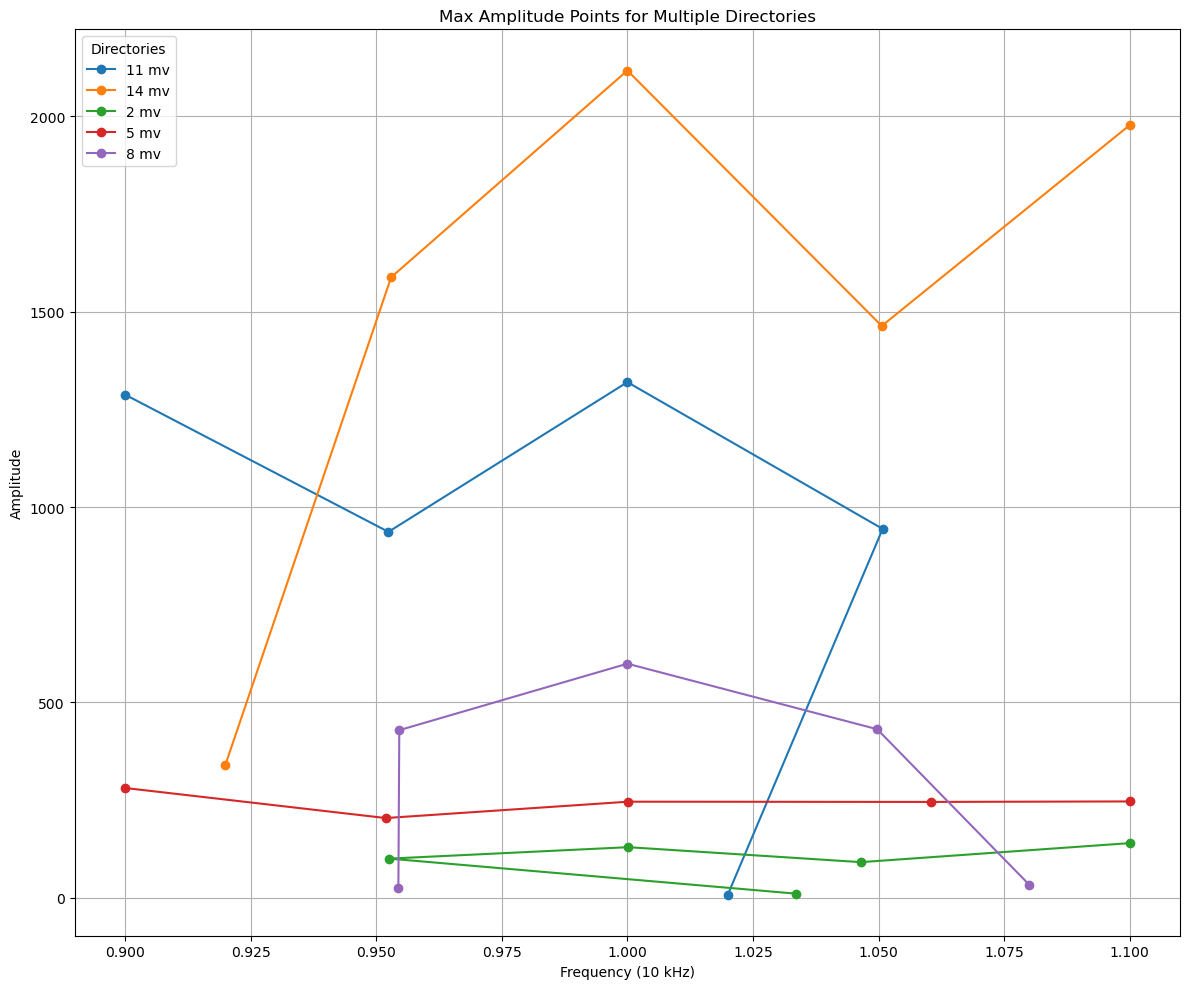

In [1]:
import glob
import os
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 주파수 범위 설정 (단위: Hz)
min_freq = 9000  # 최소 주파수 (9 kHz)
max_freq = 11000  # 최대 주파수 (11 kHz)

# 상위 디렉토리로 이동
parent_dir = os.path.dirname(os.getcwd())
subdirs = sorted([d for d in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, d))])

# 플롯 설정
plt.figure(figsize=(12, 10))

# 상위 디렉토리 내의 각 서브 디렉토리에 대해 플롯 생성
for subdir in subdirs:
    subdir_path = os.path.join(parent_dir, subdir)
    csv_files = glob.glob(os.path.join(subdir_path, "*.csv"))
    
    # 디렉토리에서 하나의 플롯에 대한 데이터 수집
    max_frequencies = []
    max_amplitudes = []
    
    for file in csv_files:
        data = pd.read_csv(file, skiprows=6)
        data.columns = ['Time', 'Voltage']
        data = data.dropna()

        time = data['Time'].values
        voltage = data['Voltage'].values

        n = len(time)
        dt = time[1] - time[0]
        frequencies = fftfreq(n, d=dt)
        fft_values = fft(voltage)

        positive_frequencies = frequencies[:n//2]
        positive_fft_values = np.abs(fft_values[:n//2])

        filtered_indices = (positive_frequencies >= min_freq) & (positive_frequencies <= max_freq)
        filtered_frequencies = positive_frequencies[filtered_indices]
        filtered_fft_values = positive_fft_values[filtered_indices]

        new_frequency_points = np.linspace(filtered_frequencies.min(), filtered_frequencies.max(), 1000)
        interpolator = interp1d(filtered_frequencies, filtered_fft_values, kind='cubic')
        new_fft_values = interpolator(new_frequency_points)

        max_amplitude_index = np.argmax(new_fft_values)
        max_frequency = new_frequency_points[max_amplitude_index] / 10000  # 주파수를 10 kHz 단위로 변환
        max_amplitude = new_fft_values[max_amplitude_index]

        # 최대 진폭 데이터를 리스트에 저장
        max_frequencies.append(max_frequency)
        max_amplitudes.append(max_amplitude)
    
    # 저장된 데이터로 플롯, 점과 점을 실선으로 연결
    plt.plot(max_frequencies, max_amplitudes, '-o', label=subdir)

# 플롯 설정
plt.title('Max Amplitude Points for Multiple Directories')
plt.xlabel('Frequency (10 kHz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(title='Directories', loc='best')
plt.tight_layout()
plt.show()


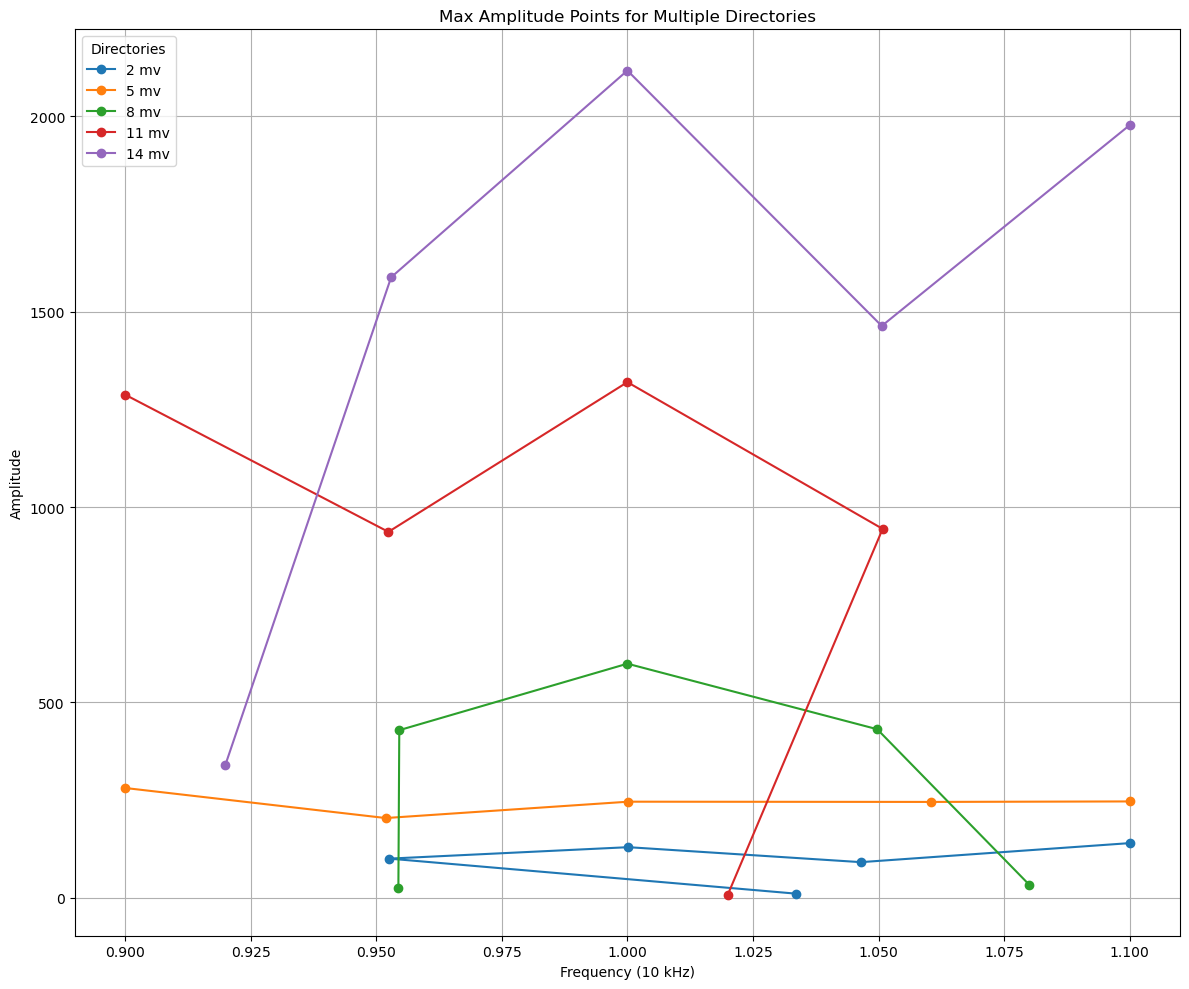

In [2]:
import glob
import os
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 주파수 범위 설정 (단위: Hz)
min_freq = 9000  # 최소 주파수 (9 kHz)
max_freq = 11000  # 최대 주파수 (11 kHz)

# 상위 디렉토리로 이동
parent_dir = os.path.dirname(os.getcwd())

# 디렉토리 이름을 지정된 순서로 정렬
ordered_dirs = ['2 mv', '5 mv', '8 mv', '11 mv', '14 mv']

# 플롯 설정
plt.figure(figsize=(12, 10))

# 지정된 순서대로 각 서브 디렉토리에 대해 플롯 생성
for subdir in ordered_dirs:
    subdir_path = os.path.join(parent_dir, subdir)
    csv_files = glob.glob(os.path.join(subdir_path, "*.csv"))
    
    # 디렉토리에서 하나의 플롯에 대한 데이터 수집
    max_frequencies = []
    max_amplitudes = []
    
    for file in csv_files:
        data = pd.read_csv(file, skiprows=6)
        data.columns = ['Time', 'Voltage']
        data = data.dropna()

        time = data['Time'].values
        voltage = data['Voltage'].values

        n = len(time)
        dt = time[1] - time[0]
        frequencies = fftfreq(n, d=dt)
        fft_values = fft(voltage)

        positive_frequencies = frequencies[:n//2]
        positive_fft_values = np.abs(fft_values[:n//2])

        filtered_indices = (positive_frequencies >= min_freq) & (positive_frequencies <= max_freq)
        filtered_frequencies = positive_frequencies[filtered_indices]
        filtered_fft_values = positive_fft_values[filtered_indices]

        new_frequency_points = np.linspace(filtered_frequencies.min(), filtered_frequencies.max(), 1000)
        interpolator = interp1d(filtered_frequencies, filtered_fft_values, kind='cubic')
        new_fft_values = interpolator(new_frequency_points)

        max_amplitude_index = np.argmax(new_fft_values)
        max_frequency = new_frequency_points[max_amplitude_index] / 10000  # 주파수를 10 kHz 단위로 변환
        max_amplitude = new_fft_values[max_amplitude_index]

        # 최대 진폭 데이터를 리스트에 저장
        max_frequencies.append(max_frequency)
        max_amplitudes.append(max_amplitude)
    
    # 저장된 데이터로 플롯, 점과 점을 실선으로 연결
    plt.plot(max_frequencies, max_amplitudes, '-o', label=subdir)

# 플롯 설정
plt.title('Max Amplitude Points for Multiple Directories')
plt.xlabel('Frequency (10 kHz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(title='Directories', loc='best')
plt.tight_layout()
plt.show()
